In [1]:
%matplotlib nbagg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plot_functions as pf
import dill

In [14]:
def plot_ratio_value(dead, den, tgt, gix, data):
    opt = None
    plt.title('tgt' + str(tgt) + ' dead' + str(dead) + ' den' + str(den) + ' gix' + str(gix))
    opt = pd.Series(data.loc[(data.ntgts == tgt) & (data.dead == dead) & (data.graphix == gix) &
                             (data.den == den) & (data.apxt.isnull().values), 'gameval'].item()).copy()
    for i in [1, 2, 3, 10, 20, 30]:
        temp = None
        temp = pd.Series(data.loc[(data.ntgts == tgt) & (data.dead == dead) & (
            data.graphix == gix) & (data.den == den) & (data.apxt == i), 'gameval'].item()).copy()
        for t, v in temp.items():
            temp.at[t] = (temp.at[t] / opt.at[t] if t in opt.index else temp.at[t] / 1)
        plt.plot(temp, label='apx' + str(i))
    plt.legend()

In [2]:
data = pd.read_pickle('data_aggregates.pickle', )

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2158 entries, 0 to 2157
Data columns (total 18 columns):
apxt               2006 non-null float64
dead               1124 non-null float64
den                2158 non-null float64
ei                 2158 non-null float64
et                 2158 non-null float64
gameval            2158 non-null object
graphix            2158 non-null float64
improves           2027 non-null object
ntgts              2158 non-null float64
optres             2158 non-null int64
reldead            1034 non-null float64
time_cov           2158 non-null float64
time_dom           2006 non-null float64
time_max           2158 non-null float64
time_res           2158 non-null object
time_res_noenum    2027 non-null object
time_short         2158 non-null float64
time_tot           2158 non-null float64
dtypes: float64(13), int64(1), object(4)
memory usage: 303.5+ KB


In [4]:
data[:3]

,apxt,dead,den,ei,et,gameval,graphix,improves,ntgts,optres,reldead,time_cov,time_dom,time_max,time_res,time_res_noenum,time_short,time_tot
0,NaN,5.0,8.0,10.0,1.0,2 0.442538 3 0.564549 4 0.734820 5 ...,5.0,NaN,25.0,6,NaN,51.556861,NaN,0.610278,2 2.429241 3 3.303007 4 6.143880 5 ...,NaN,0.005582,171.001366
1,NaN,5.0,10.0,10.0,1.0,1 0.367927 2 0.574033 3 0.778241 4 ...,0.0,NaN,25.0,5,NaN,367.407536,NaN,2.588750,1 1.672345 2 3.740902 3 15.098199 4...,NaN,0.010190,716.386491
2,NaN,5.0,10.0,10.0,1.0,1 0.291005 2 0.527728 3 0.717847 4 ...,9.0,NaN,25.0,5,NaN,260.962139,NaN,1.706243,1 0.778282 2 3.158736 3 3.414490 4...,NaN,0.010512,519.439340


<IPython.core.display.Javascript object>


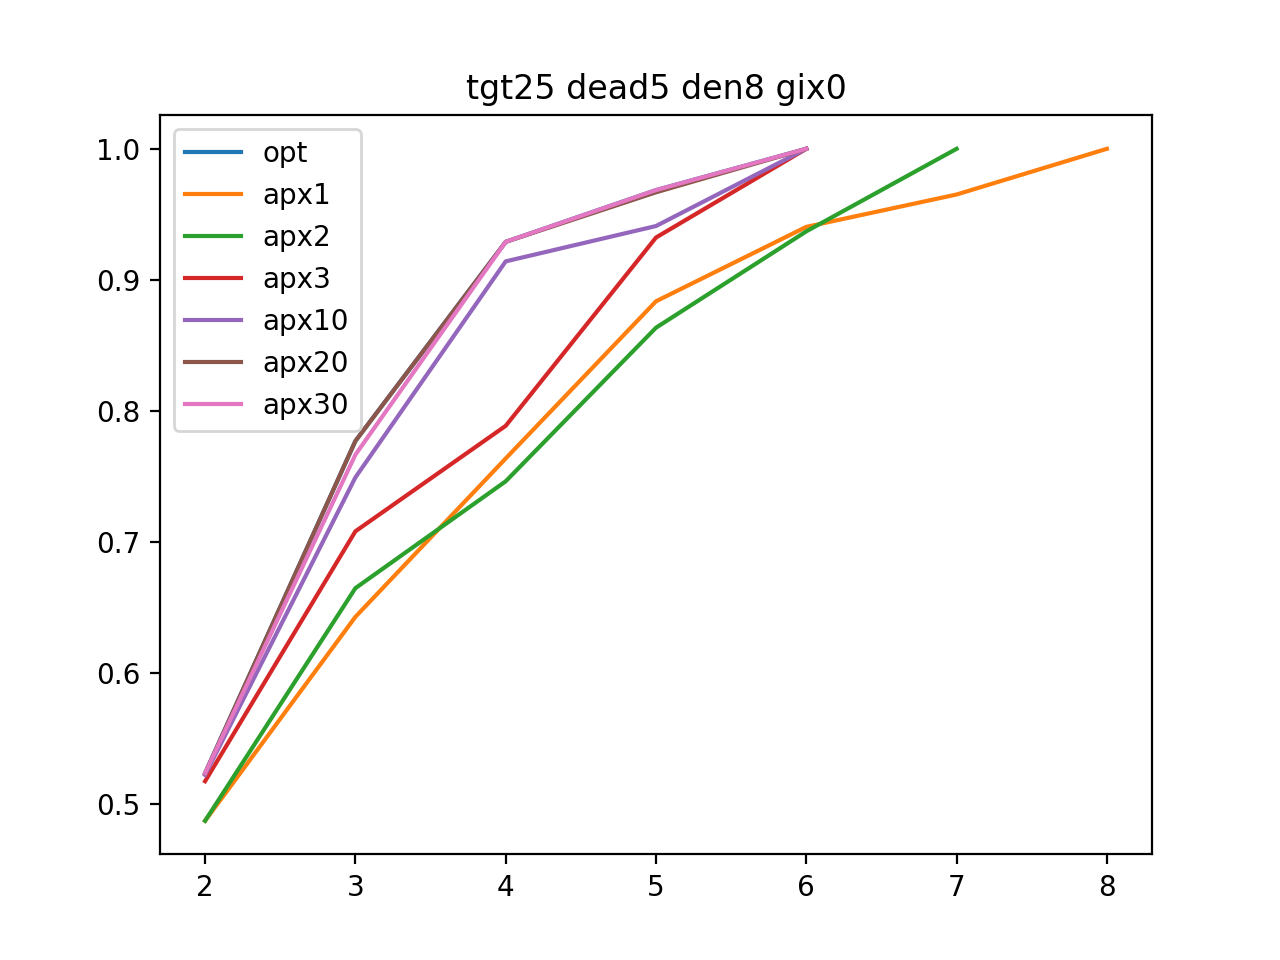

In [134]:
def plot_ratio_value(dead, den, tgt, gix, data):
    opt = None
    f, ax = plt.subplots()
    #ax.title('tgt' + str(tgt) + ' dead' + str(dead) + ' den' + str(den) + ' gix' + str(gix))
    opt = pd.Series(data.loc[(data.ntgts == tgt) & (data.dead == dead) & (data.graphix == gix) &
                             (data.den == den) & (data.apxt.isnull().values), 'gameval'].item()).copy()
    print opt
    for i in [1, 2, 3, 10, 20, 30]:
        temp = None
        temp = pd.Series(data.loc[(data.ntgts == tgt) & (data.dead == dead) & (
            data.graphix == gix) & (data.den == den) & (data.apxt == i), 'gameval'].item()).copy()
        for t, v in temp.items():
            temp.at[t] = (temp.at[t] / opt.at[t] if t in opt.index else temp.at[t] / 1)
        ax.plot(temp, label='apx' + str(i))
    ax.legend()
    return axdef plot_ratio_value(dead, den, tgt, gix, data):
    opt = None
    f, ax = plt.subplots()
    #ax.title('tgt' + str(tgt) + ' dead' + str(dead) + ' den' + str(den) + ' gix' + str(gix))
    opt = pd.Series(data.loc[(data.ntgts == tgt) & (data.dead == dead) & (data.graphix == gix) &
                             (data.den == den) & (data.apxt.isnull().values), 'gameval'].item()).copy()
    print opt
    for i in [1, 2, 3, 10, 20, 30]:
        temp = None
        temp = pd.Series(data.loc[(data.ntgts == tgt) & (data.dead == dead) & (
            data.graphix == gix) & (data.den == den) & (data.apxt == i), 'gameval'].item()).copy()
        for t, v in temp.items():
            temp.at[t] = (temp.at[t] / opt.at[t] if t in opt.index else temp.at[t] / 1)
        ax.plot(temp, label='apx' + str(i))
    ax.legend()
    return ax

# Compute Time

<IPython.core.display.Javascript object>


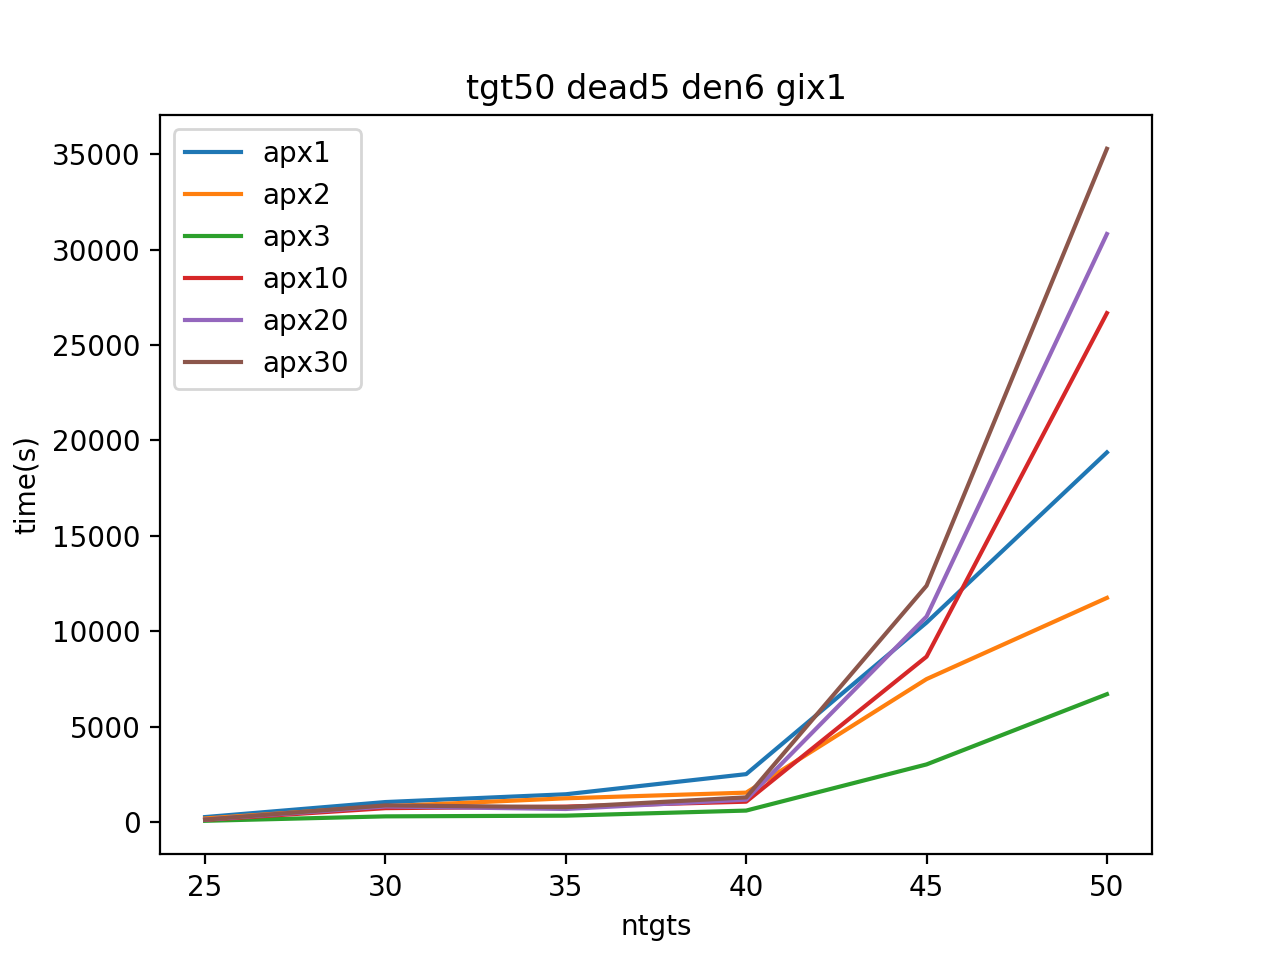

In [57]:
plt.figure()
dead = 5
den = 'min'
plt.title('dead ' +str(dead) + ' den ' + str(den))
opt = data.loc[(data.dead==5) & ((data.den==8) | (data.den==6))& (data.apxt.isnull().values), ['ntgts', 'time_tot']].groupby('ntgts')
#plt.plot(opt.aggregate(np.mean), label='opt')
for apx in [1, 2, 3, 10, 20, 30]:
    temp = data.loc[(data.dead==5) & ((data.den==8) | (data.den==6))& (data.apxt==apx), ['ntgts', 'time_tot']].groupby('ntgts')
    plt.plot(temp.aggregate(np.mean), label='apx' + str(apx))
plt.legend()
plt.xlabel('ntgts')
plt.ylabel('time(s)')
plt.show()

<IPython.core.display.Javascript object>


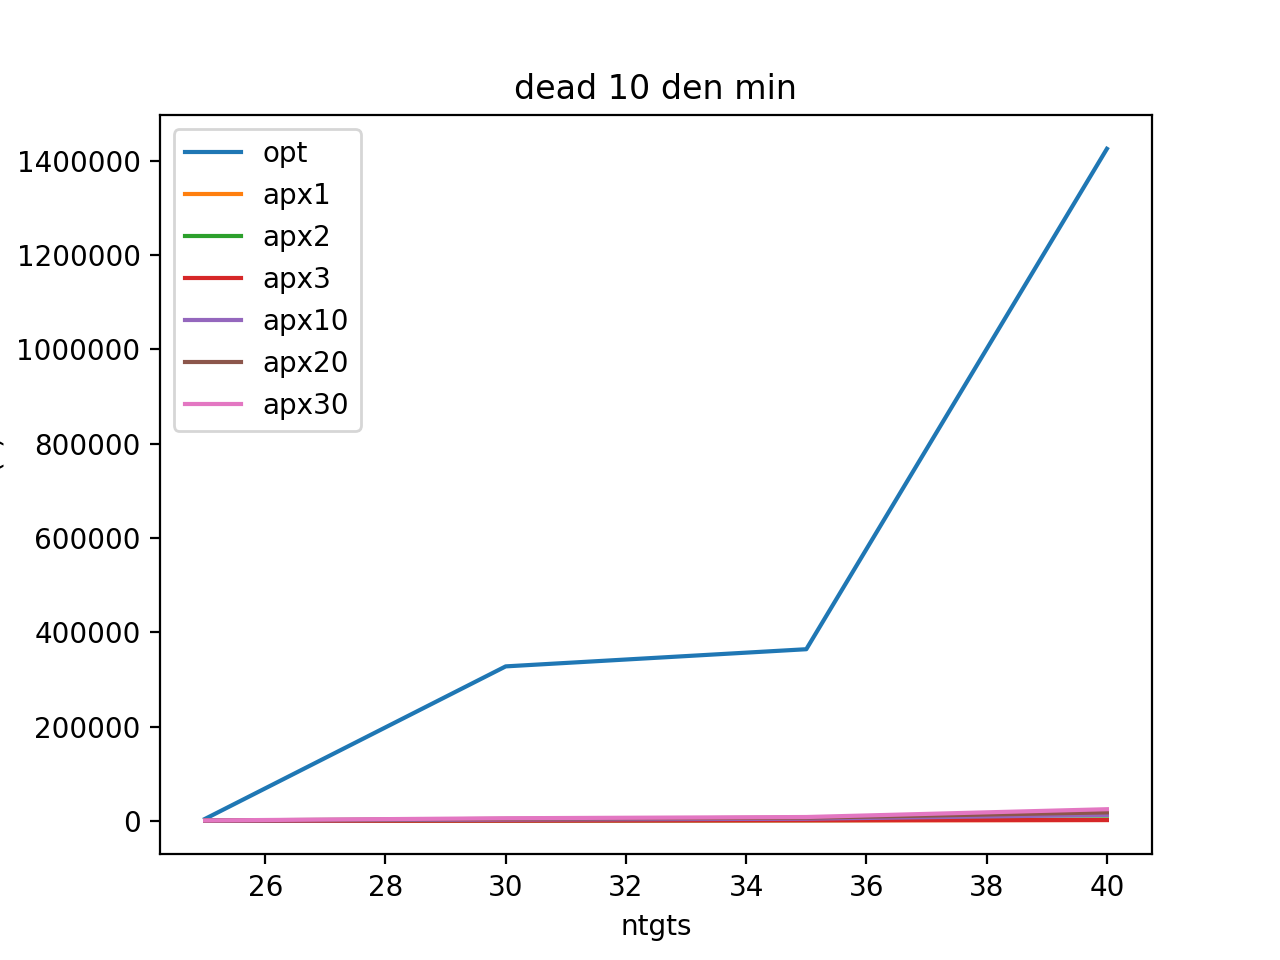

In [25]:
plt.figure()
dead = 10
den = 'min'
plt.title('dead ' +str(dead) + ' den ' + str(den))
opt = data.loc[(data.dead==dead) & ((data.den==8) | (data.den==6))& (data.apxt.isnull().values), ['ntgts', 'time_tot']].groupby('ntgts')
plt.plot(opt.aggregate(np.mean), label='opt')
for apx in [1, 2, 3, 10, 20, 30]:
    temp = data.loc[(data.dead==dead) & ((data.den==8) | (data.den==6))& (data.apxt==apx), ['ntgts', 'time_tot']].groupby('ntgts')
    plt.plot(temp.aggregate(np.mean), label='apx' + str(apx))
plt.legend()
plt.xlabel('ntgts')
plt.ylabel('time(s)')
plt.show()

<IPython.core.display.Javascript object>


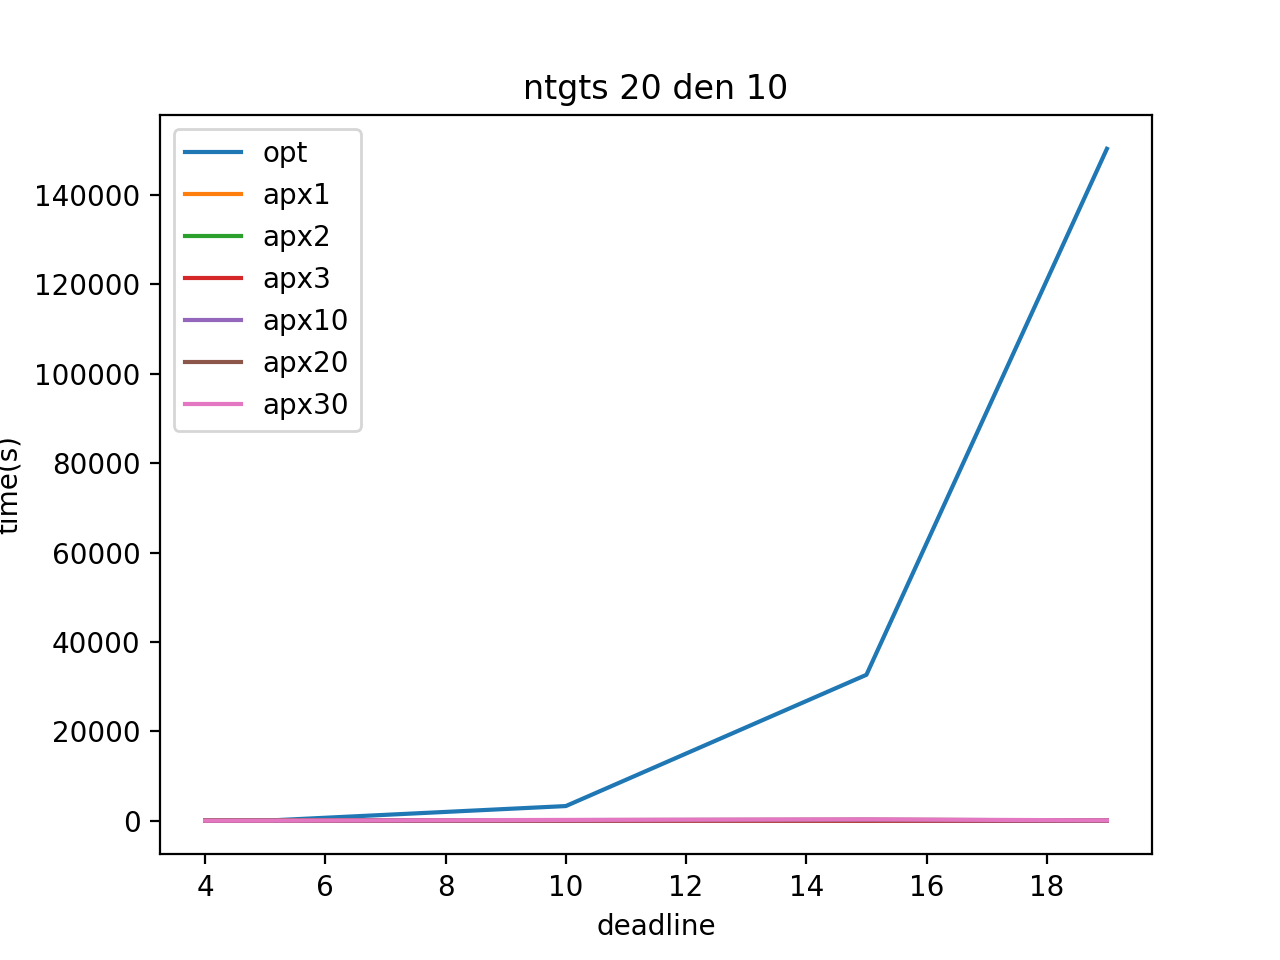

In [26]:
plt.figure()
ntgts = 20
den = 10
plt.title('ntgts ' +str(ntgts) + ' den ' + str(den))
opt = data.loc[(data.ntgts==20) & (data.den==10) & (data.apxt.isnull().values), ['dead', 'time_tot']].groupby('dead')
plt.plot(opt.aggregate(np.mean), label='opt')
for apx in [1, 2, 3, 10, 20, 30]:
    temp = data.loc[(data.ntgts==20) & (data.den==10) & (data.apxt==apx), ['dead', 'time_tot']].groupby('dead')
    plt.plot(temp.aggregate(np.mean), label='apx' + str(apx))
plt.legend()
plt.xlabel('deadline')
plt.ylabel('time(s)')
plt.show()

# Game Value

<IPython.core.display.Javascript object>


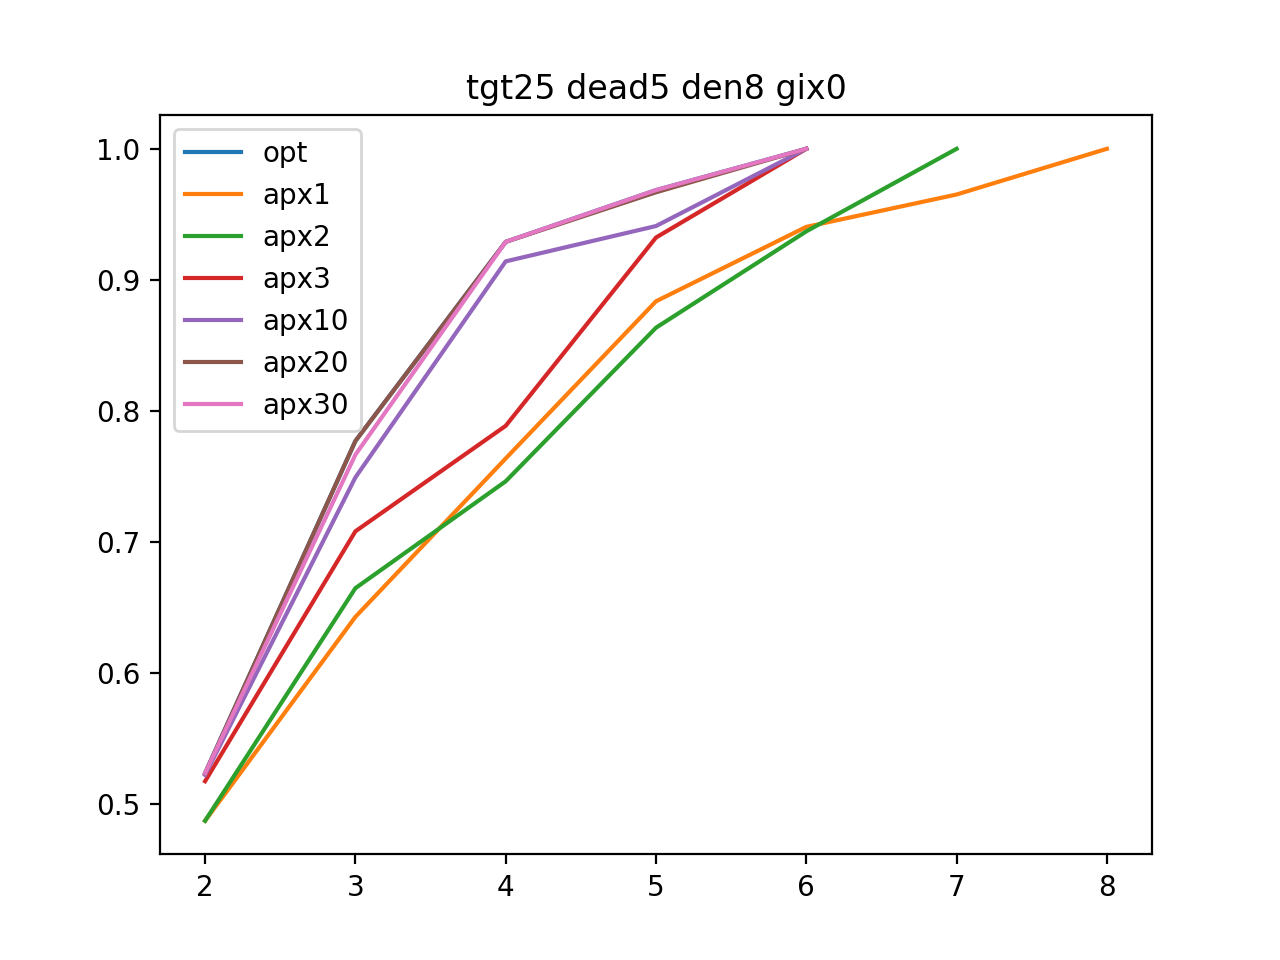

In [133]:
plt.figure()
dead=5
den=8
tgt=25
gix=0
plt.title('tgt'+str(tgt)+' dead'+str(dead)+' den'+str(den)+' gix'+str(gix))
plt.plot(data.loc[(data.ntgts==tgt) & (data.dead==dead) & (data.graphix==gix) & (data.den==den) & (data.apxt.isnull().values), 'gameval'].item(), label='opt')
for i in [1, 2, 3, 10, 20, 30]:
    plt.plot(data.loc[(data.ntgts==tgt) & (data.dead==dead) & (data.graphix==gix) & (data.den==den) & (data.apxt==i), 'gameval'].item(), label='apx' + str(i))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


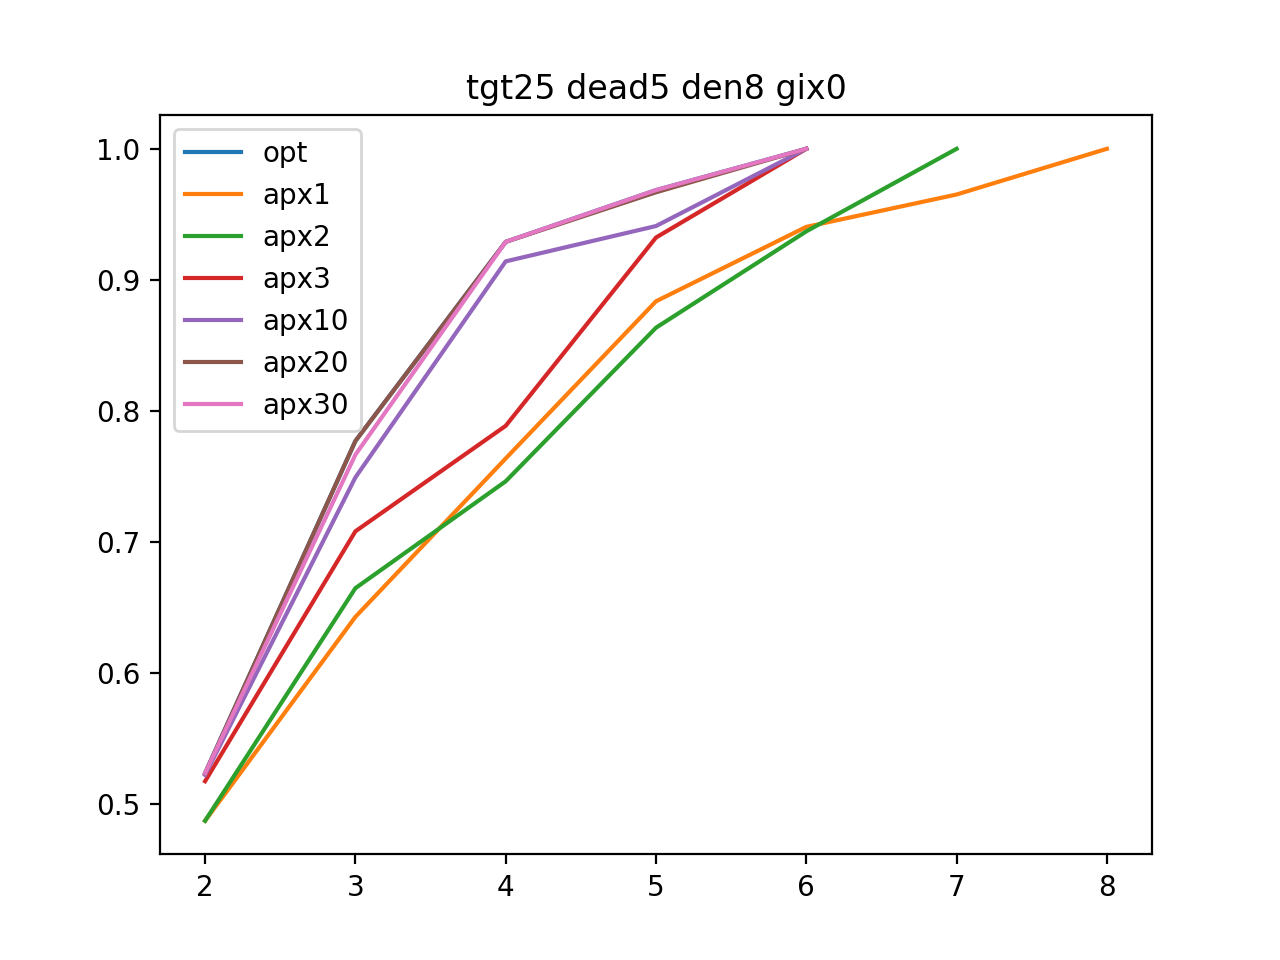

In [133]:
plt.figure()
reldead=2
den=10
tgt=45
gix=0
plt.title('tgt'+str(tgt)+' dead'+str(reldead)+' den'+str(den)+' gix'+str(gix))
plt.plot(data.loc[(data.ntgts==tgt) & (data.dead==dead) & (data.graphix==gix) & (data.den==den) & (data.apxt.isnull().values), 'gameval'].item(), label='opt')
for i in [1, 2, 3, 10, 20, 30]:
    plt.plot(data.loc[(data.ntgts==tgt) & (data.dead==dead) & (data.graphix==gix) & (data.den==den) & (data.apxt==i), 'gameval'].item(), label='apx' + str(i))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


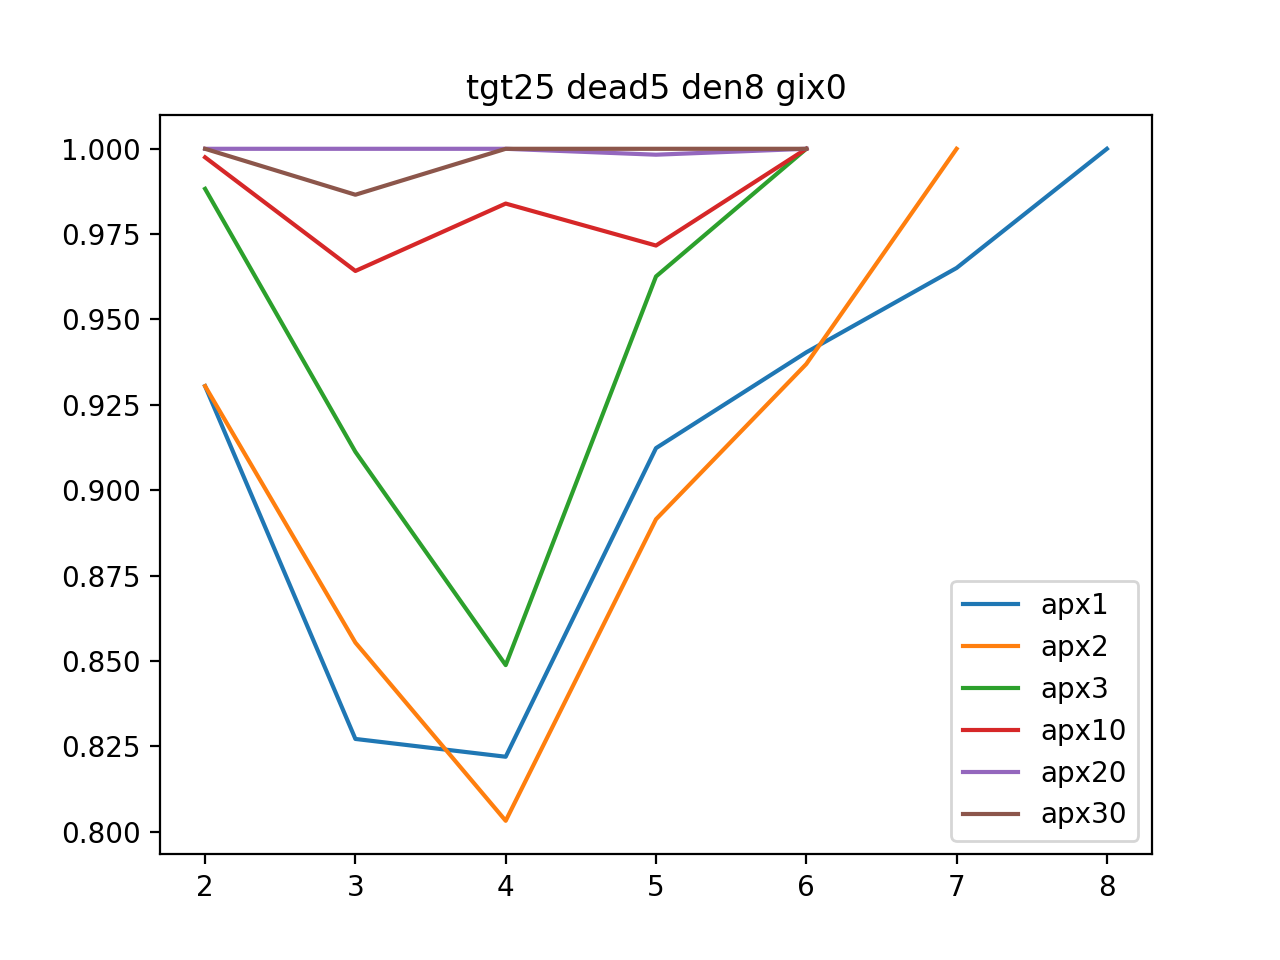

In [16]:
plot_ratio_value(5, 8, 25, 0, data)

# Time %

In [ ]:
plt.figure()
dead=5
den=6
tgt=50
gix=1
plt.title('tgt'+str(tgt)+' dead'+str(dead)+' den'+str(den)+' gix'+str(gix))
opt = data.loc[(data.ntgts==tgt) & (data.dead==dead) & (data.graphix==gix) & (data.den==den) & (data.apxt.isnull().values), 'gameval'].item()
#plt.plot(opt, label='opt')
for i in [1, 2, 3, 10, 20, 30]:
    temp = data.loc[(data.ntgts==tgt) & (data.dead==dead) & (data.graphix==gix) & (data.den==den) & (data.apxt==i), 'gameval'].item()
    for t in range(len(temp)):
        if t < len(opt):
            temp.iat[t] /= opt.iat[t]
        else:
            temp.iat[t] /= 1
    plt.plot(temp, label='apx' + str(i))
plt.legend()
plt.xlabel('num res')
plt.ylabel('game value')
plt.show()

<IPython.core.display.Javascript object>


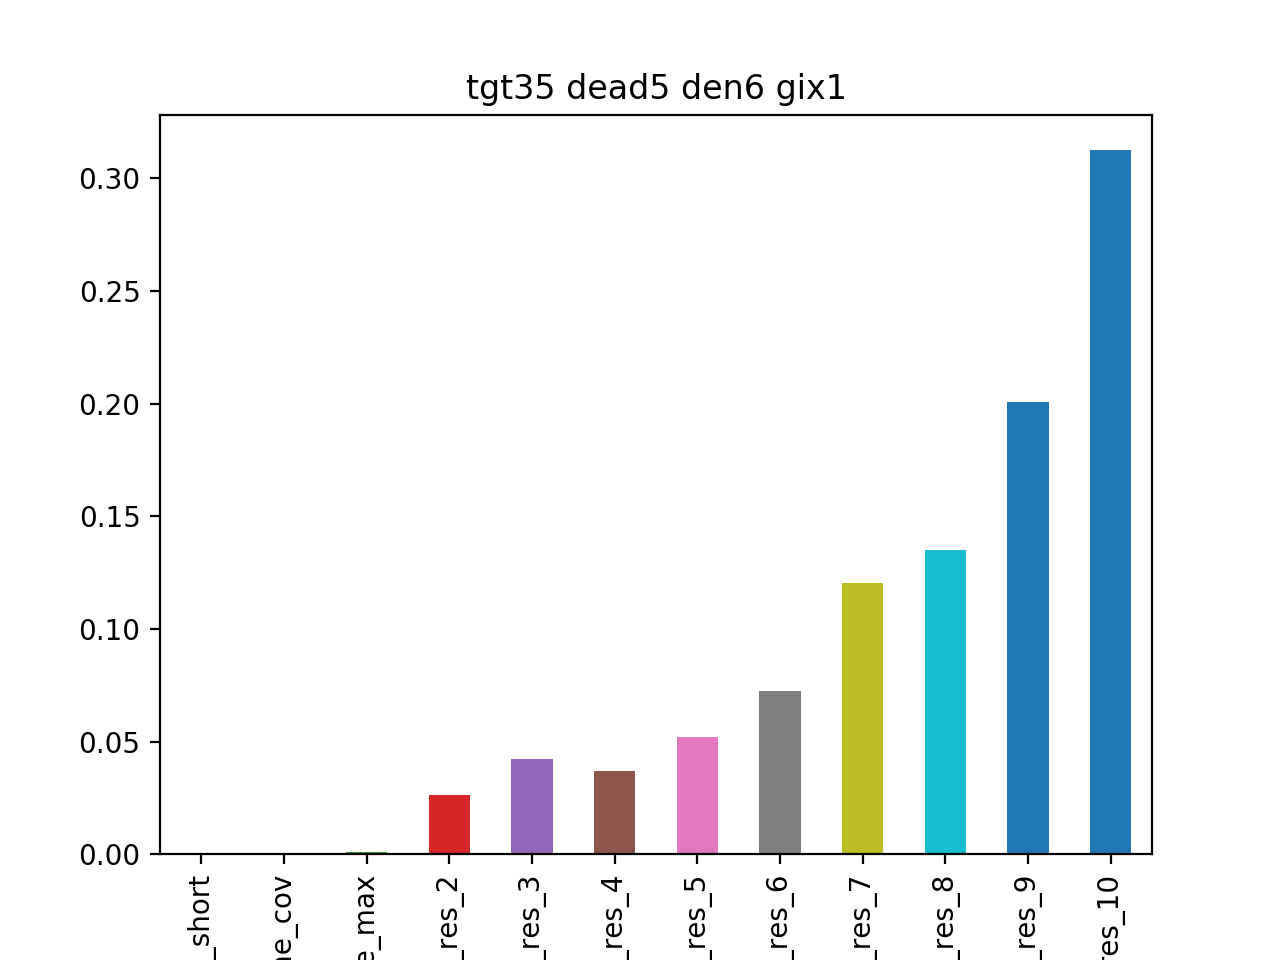

time_short    0.018996
time_cov      0.390251
time_max      2.064349
Name: 0, dtype: float64


/usr/local/miniconda3/envs/th/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


In [115]:
dead=5
den=6
tgt=35
gix=1
plt.figure()
plt.title('tgt'+str(tgt)+' dead'+str(dead)+' den'+str(den)+' gix'+str(gix))
temp = data.loc[(data.ntgts==tgt) & (data.dead==dead) & (data.graphix==gix) & (data.den==den) & (data.apxt==1), ['time_short', 'time_cov', 'time_dom', 'time_max', 'time_res', 'time_tot']]
temp['time_cov'] += temp['time_dom']
del(temp['time_dom'])
del(temp['time_tot'])
seriestemp = temp.reset_index().iloc[:, 1:-1].squeeze()
print seriestemp
for i, t in temp.time_res.item().items():
    name='time_res_'+str(i)
    seriestemp =  seriestemp.set_value(name, t)

seriestemp /= seriestemp.sum()
seriestemp.plot.bar()
plt.show()